In [8]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

#funzioni
#Pt 1
def Lambda(x,Z,F,m): # nm
    L = x*F/(Z*m) *M  # M: normalizzazione L[nm]
    return L

#errore
def SigmaLambda(x,sx,Z,sZ,F,sF):
    dx = Lambda(sx,Z, F,m)
    dF = Lambda( x,Z,sF,m)
    dZ = F*x/(np.power(Z,2)*m)*sZ *M
    sL = np.sqrt(np.power(dx,2) + np.power(dZ,2) + np.power(dF,2) )
    return sL

In [9]:
df1   = pd.read_csv('data1.csv')
m     = np.asarray(df1.iloc[:,0]) # m del minimo
F     = np.asarray(df1.iloc[:,1]) #fenditura

sF    = np.full(len(F),0.001) # sigma a caso
#df1

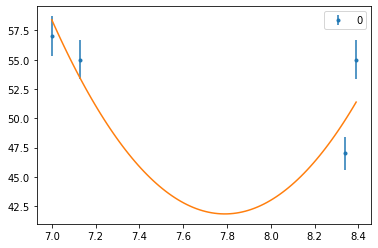

Xmin =  7.79020100244295
a =  26.544319189827 +- 42.197349513262836
b =  -413.5711639235119 +- 650.7287235289989
COV =  -27458.50842423222


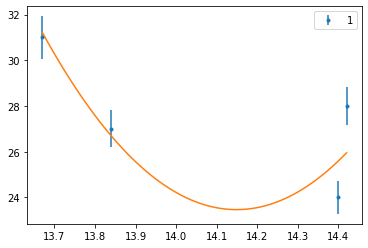

Xmin =  14.149020051298441
a =  33.84698917665372 +- 37.12113813568784
b =  -957.8034570731096 +- 1044.7802331922014
COV =  -38783.12020817429


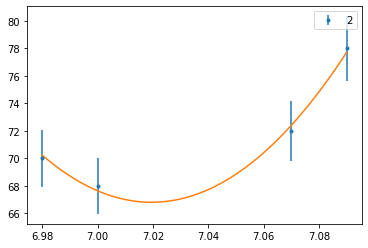

Xmin =  7.019536098024523
a =  2194.2954117289596 +- 364.89929639478476
b =  -30805.87170472203 +- 5133.828273832293
COV =  -1873328.4755602134


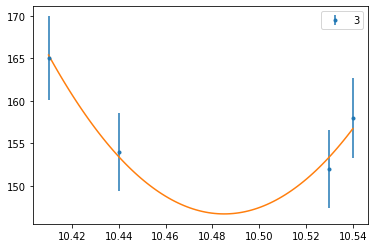

Xmin =  10.4850141236392
a =  3322.678280398481 +- 859.8842050151433
b =  -69676.65739657456 +- 18019.415498933515
COV =  -15494602.640770683


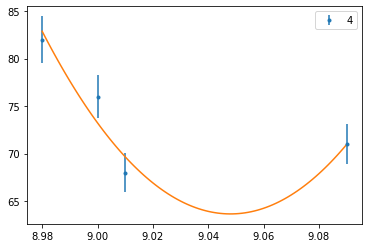

Xmin =  9.048066012482337
a =  4150.8981421683175 +- 1682.7784547442996
b =  -75115.20080285847 +- 30426.064439746053
COV =  -51200282.21804577


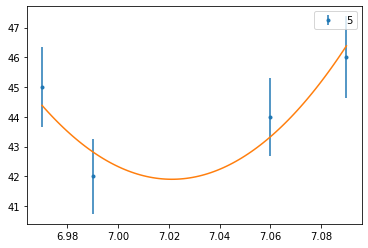

Xmin =  7.021202331030122
a =  946.870179082335 +- 548.9284385030958
b =  -13296.334217111598 +- 7717.157762470969
COV =  -4236160.896964393


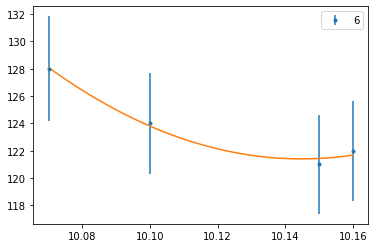

Xmin =  10.144798316935747
a =  1195.8317618342264 +- 405.51916556692896
b =  -24262.944089588338 +- 8204.76626096025
COV =  -3327188.336383236


In [10]:
ArrX = np.asarray(df1.iloc[:,8:12])
ArrY = np.asarray(df1.iloc[:,3:7])
ArrsX = ArrX*0.005
ArrsY = ArrY*0.03

Xmin = np.asarray([])
sXmin = np.asarray([])

def Parabola(x,a,b,c):
    return a*x**2 + b*x +c
def SigmaVertice(a,b,sa,sb,COV):
    da = -b/(2*a**2) *sa
    db = -1/(2*a) *sb
    CORR = 1/(2*a**2) *COV
    #CORR = 0
    return np.sqrt(np.power(da,2) + np.power(db,2) + 2*CORR )

for f in range(len(ArrX)):

    X  = ArrX[f]
    sX = ArrsX[f]
    Y  = ArrY[f]
    sY = ArrsY[f]
    
    x = np.linspace(np.min(X),np.max(X),100)
    [a,b,c],pcov = s.optimize.curve_fit(Parabola,X,Y,sigma = sY,absolute_sigma = False)
    [sa,sb,sc] = np.sqrt(np.diag(pcov))
    plt.errorbar(X,Y,sY, ls='', marker='.',label = '{}'.format(f))
    plt.plot(x,Parabola(x,a,b,c))
    plt.legend()
    plt.show()

    Value = -b/(2*a)
    sValue = SigmaVertice(a,b,sa,sb,pcov[0][1])
    print('Xmin = ',Value)
    print('a = ',a,'+-',sa)
    print('b = ',b,'+-',sb)
    print('COV = ',pcov[0][1])
    #print(pcov)
    Xmin = np.append(Xmin,Value)                         
    sXmin = np.append(sXmin,sValue)

Xmin =  np.abs(Xmin  - df1.iloc[:,7])


Xmin[0] = Xmin[0]-0.5
Xmin[2] = Xmin[2]-0.5
Xmin[3] = Xmin[3]-0.5
Xmin[4] = Xmin[4]-0.5

In [11]:
for u in range(len(Xmin)):
    print(Xmin[u],'+-',sXmin[u])

2.60979899755705 +- 16.26769655953096
3.249020051298441 +- 21.098584894835962
0.7604639019754762 +- 1.530362144712524
1.7050141236392005 +- 3.648556723629782
1.2919339875176625 +- 4.890352453582163
1.718797668969878 +- 5.33381501129104
1.4047983169357465 +- 4.612716255780002


In [12]:
Z = 852     # mm 
sZ  = 2

sXmin = np.full(len(Xmin),0.04)

Array_L  = Lambda(Xmin,Z,F,m)
Array_sL = SigmaLambda(Xmin,sXmin,Z,sZ,F,sF)
L = np.sum(Array_L)/len(Array_L)
sL = my.sqrt_sum(Array_sL)/len(Array_sL)
#sL = 1
print(Array_L)
print('Lambda =',L,' +- ',sL)

0    612.628873
1    762.680763
2    357.025306
3    800.476114
4    745.748088
5    661.432182
6    540.598136
Name:  x0[mm], dtype: float64
Lambda = 640.0842089825221  +-  6.2923422025506595
